In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
cpd = pd.read_csv('housing.csv')
cpd1 = cpd.drop('total_bedrooms',axis=1)

In [3]:
cpd1

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,INLAND


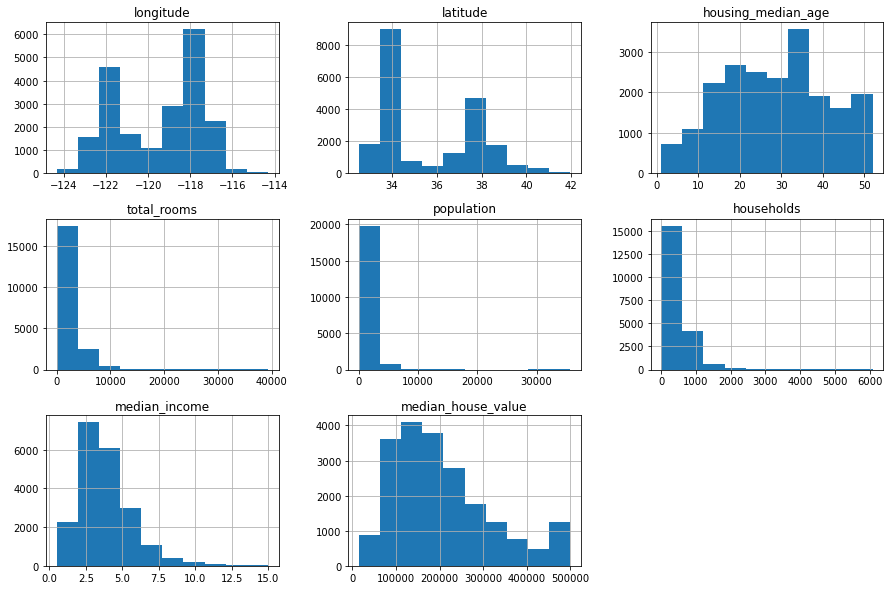

In [4]:
cpd1.hist(figsize=(15,10))
plt.show()

In [5]:
#shuffling the dataset
cpd_shuffle = cpd1.sample(n=len(cpd), random_state=1)
cpd_shuffle

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,1323.0,477.0,2.6322,140700.0,INLAND


In [6]:
ocean_proximity = cpd1['ocean_proximity']
print("Distinct values of ocean_proximity:\n")
d=pd.unique(ocean_proximity)
print(d)

Distinct values of ocean_proximity:

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [7]:
def ocpn_func(v):
    for ii, i in enumerate(d):
        if i==v:
            return ii+1
        
cpd_shuffle['opn'] = cpd_shuffle['ocean_proximity'].apply(ocpn_func)
print("new distinct values of ocean_proxinity\n")
print(pd.unique(cpd_shuffle['opn']))

new distinct values of ocean_proxinity

[2 3 1 4 5]


In [8]:
cpd_shuffle.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,opn
4712,-118.36,34.06,39.0,2810.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN,2
2151,-119.78,36.78,37.0,2185.0,1143.0,438.0,1.9784,70700.0,INLAND,3
15927,-122.42,37.73,46.0,1819.0,1534.0,406.0,4.0132,229400.0,NEAR BAY,1
82,-122.28,37.81,52.0,340.0,200.0,87.0,1.5208,112500.0,NEAR BAY,1
8161,-118.13,33.82,37.0,1530.0,711.0,283.0,5.1795,225400.0,<1H OCEAN,2


In [9]:
cpd_shuffle = cpd_shuffle.drop(['ocean_proximity'], axis=1)
cpd_shuffle.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,opn
4712,-118.36,34.06,39.0,2810.0,1109.0,624.0,3.2500,355000.0,2
2151,-119.78,36.78,37.0,2185.0,1143.0,438.0,1.9784,70700.0,3
15927,-122.42,37.73,46.0,1819.0,1534.0,406.0,4.0132,229400.0,1
82,-122.28,37.81,52.0,340.0,200.0,87.0,1.5208,112500.0,1
8161,-118.13,33.82,37.0,1530.0,711.0,283.0,5.1795,225400.0,2


In [10]:
cpd_shuffle = cpd_shuffle.dropna()

In [11]:
cpd_col = list(cpd_shuffle.columns)
cpd_shuffle[cpd_col] = StandardScaler().fit_transform(cpd_shuffle[cpd_col])

In [12]:
def lr_individual_features(train_data):
    X = cpd_shuffle[train_data]
    y = cpd_shuffle['median_house_value']
    X_train, X_test,y_train ,y_test = train_test_split(X,y,test_size=0.3)
  
    lr = LinearRegression().fit(np.array(X_train).reshape(-1,1), y_train)

    p_val = lr.predict(np.array(X_test).reshape(-1,1))

    r = p_val - y_test

    plt.hist(r)
    plt.show()
    
    ma = mae(y_test, p_val)
    m = mse(y_test, p_val) ** 0.5
    #find sse by hand
    mean_of_values = np.mean(p_val)

    dv = []
    for v in p_val:
        dv.append(v - mean_of_values)

    dv2 = []
    for v in dv:
        dv2.append(v**2)
    
    sse = (np.sum(dv2)) ** 0.5
    
    
    r2 = r2_score(y_test, p_val)
    
    print("median_house_values and  " +train_data+" :")
    print("coffecients: "+  str(lr.coef_))
    print("Mean absolute error: "+  str(ma))
    print("Mean squared error: "+  str(m))
    print("Sum Squared error: "+  str(sse))
    print("R Squared score: "+  str(r2))
    print("")
    
    plt.scatter(X_test,y_test, color="blue")
    plt.plot(X_test,p_val, color="orange")
    plt.show()

In [13]:
print(cpd_shuffle.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'opn'],
      dtype='object')


In [14]:
def multiv_regression():
    X = cpd_shuffle.loc[:,cpd_shuffle.columns!='median_house_value']
    y = cpd_shuffle['median_house_value']
    X_train, X_test,y_train ,y_test = train_test_split(X,y,test_size=0.3)
    print(X_train)
    lr = LinearRegression()
    lr.fit(np.array(X_train).reshape(-1,8), np.array(y_train).reshape(-1,1))

    p_val = lr.predict(np.array(X_test).reshape(-1,8))
    
    res = p_val -  np.array(y_test).reshape(-1,1)

    plt.hist(res)
    plt.show()
    
    mean_absolute = mae(y_test, p_val)
    mean_squared = mse(y_test, p_val) ** 0.5
    mean_of_values = np.mean(p_val)

    d_vals = []
    for val in p_val:
        d_vals.append(val - mean_of_values)

    daviation_of_values2 = []
    for val in d_vals:
        daviation_of_values2.append(val**2)
    
    ss_e = (np.sum(daviation_of_values2)) ** 0.5
    
    
    r_2 = r2_score(y_test, p_val)
    
    print("median_house_values and all features")
    print("coffecients: "+  str(lr.coef_))
    print("Mean absolute error: "+  str(mean_absolute))
    print("Mean squared error: "+  str(mean_squared))
    print("Sum Squared error: "+  str(ss_e))
    print("R Squared score: "+  str(r_2))
    print("")
    
    
    xTestPlot = np.array(X_test).reshape(-1,8)

    plt.scatter(xTestPlot[:,0], y_test, color="green")
    plt.scatter(xTestPlot[:,1], y_test, color="orange")
    plt.scatter(xTestPlot[:,2], y_test, color="purple")
    plt.scatter(xTestPlot[:,3], y_test, color="blue")
    plt.scatter(xTestPlot[:,4], y_test, color="yellow")
    plt.scatter(xTestPlot[:,5], y_test, color="cyan")
    plt.scatter(xTestPlot[:,6], y_test, color="grey")
    plt.scatter(xTestPlot[:,7], y_test, color="pink")
    
    plt.plot(xTestPlot, p_val, color="red")
    plt.show()

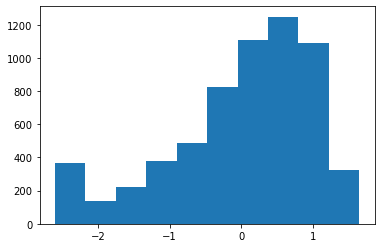

median_house_values and  longitude :
coffecients: [-0.03708928]
Mean absolute error: 0.7942691275305328
Mean squared error: 1.0041529343190385
Sum Squared error: 2.933469182439904
R Squared score: 0.0034534346001654503



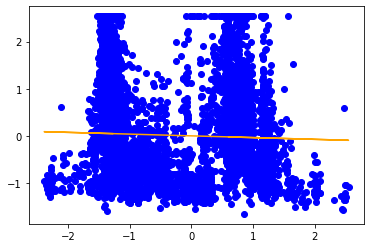

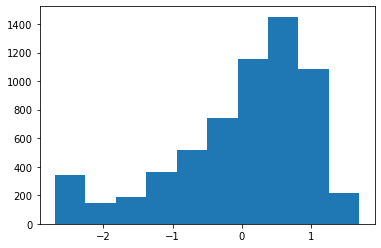

median_house_values and  latitude :
coffecients: [-0.14188806]
Mean absolute error: 0.7839480186832274
Mean squared error: 0.9909986315104806
Sum Squared error: 11.182807343005795
R Squared score: 0.022242154468903874



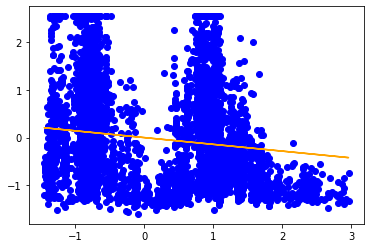

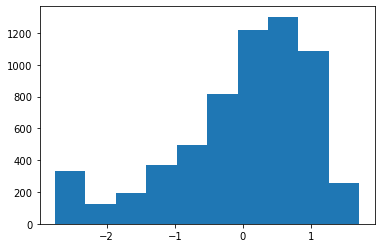

median_house_values and  housing_median_age :
coffecients: [0.10726769]
Mean absolute error: 0.7811917932275048
Mean squared error: 0.9929189050315225
Sum Squared error: 8.453097989921016
R Squared score: 0.010390921837471145



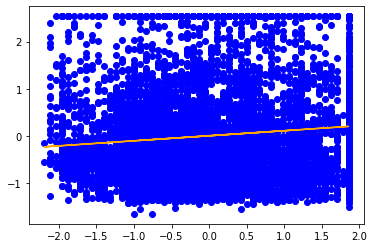

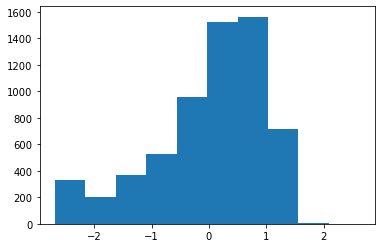

median_house_values and  total_rooms :
coffecients: [0.13518288]
Mean absolute error: 0.778025490510799
Mean squared error: 0.9830971793333384
Sum Squared error: 11.197282292418503
R Squared score: 0.01953751430204209



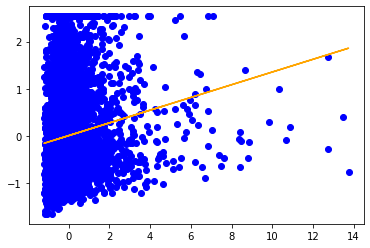

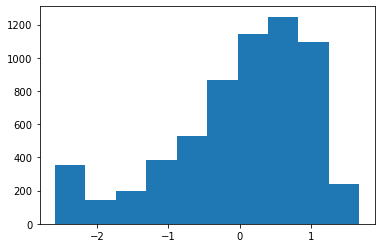

median_house_values and  population :
coffecients: [-0.0233777]
Mean absolute error: 0.7807212988770379
Mean squared error: 0.9889894516449371
Sum Squared error: 1.777086507473184
R Squared score: 0.0007045238546846688



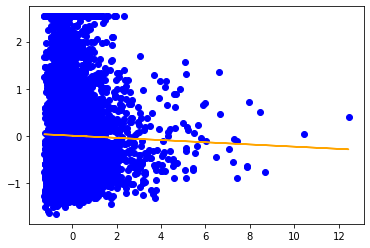

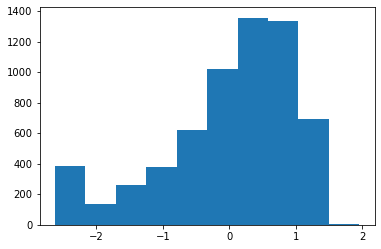

median_house_values and  households :
coffecients: [0.06676276]
Mean absolute error: 0.7893665966335319
Mean squared error: 1.0030358731024462
Sum Squared error: 5.1430609064259745
R Squared score: 0.003824956955023384



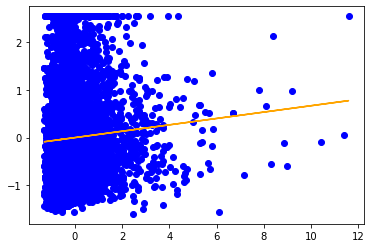

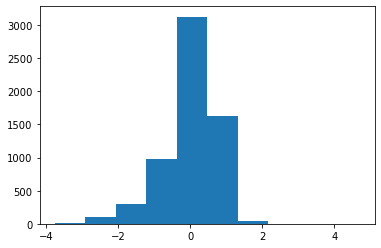

median_house_values and  median_income :
coffecients: [0.68930663]
Mean absolute error: 0.5468248645363958
Mean squared error: 0.7333210203347097
Sum Squared error: 53.41645063291649
R Squared score: 0.458310191573019



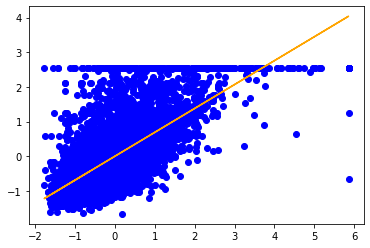

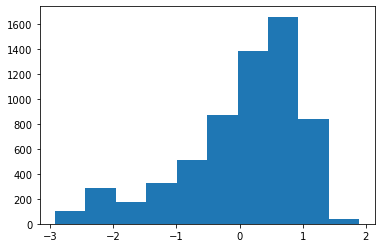

median_house_values and  opn :
coffecients: [-0.2183238]
Mean absolute error: 0.7526996903043472
Mean squared error: 0.9590245230749167
Sum Squared error: 17.296415032814036
R Squared score: 0.03741621955571928



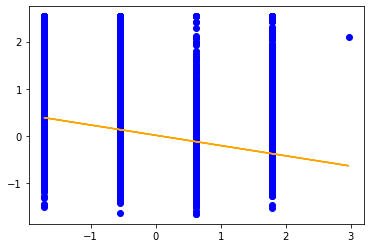

In [15]:
for i in cpd_shuffle.columns:
    if(i!="median_house_value"):
        lr_individual_features(i)

       longitude  latitude  housing_median_age  total_rooms  population  \
7391    0.658705 -0.782743            1.538349    -0.725977   -0.558511   
16980  -1.362774  0.907410            0.584852    -0.105320   -0.208822   
7460    0.688653 -0.801471            0.584852    -0.586627    0.038433   
14153   1.242688 -1.339885            0.187562    -0.717726   -0.882591   
3099    0.943210  0.008492           -1.083767     0.029904   -0.159371   
...          ...       ...                 ...          ...         ...   
8732    0.623766 -0.838925            1.061601    -0.527037   -0.466673   
8662    0.593818 -0.843607           -0.686477    -0.167661   -0.313905   
9189    0.723592 -0.656333            1.856182    -1.009718   -1.128963   
11775  -0.878618  1.469234           -2.037264     8.057637    6.124436   
5732    0.688653 -0.689106            1.617807    -0.388604   -0.609728   

       households  median_income       opn  
7391    -0.741628      -1.164438 -0.544048  
16980   -

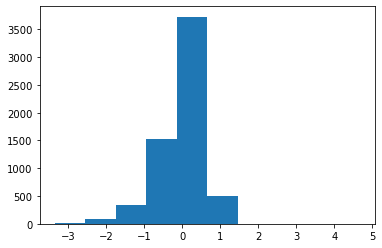

median_house_values and all features
coffecients: [[-0.71177565 -0.77171787  0.11177147 -0.03539756 -0.41094303  0.48335114
   0.62877159 -0.03014749]]
Mean absolute error: 0.43950282114214295
Mean squared error: 0.5922130801737613
Sum Squared error: 62.686395947910476
R Squared score: 0.6457257098744483



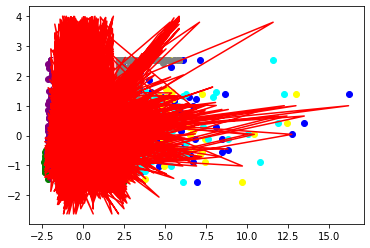

In [16]:
multiv_regression()

In [ ]:
#Lasso
X = cpd_shuffle.loc[:,df.columns!='median_house_value']
y = cpd_shuffle['median_house_value']
kf = KFold(n_splits=5, random_state=42 , shuffle=True)

for train_i, test_i in kf.split(X):
    X_train, X_test = X.take(list(train_i),axis=0), X.take(list(test_i),axis=0)
    y_train, y_test = y.take(list(train_i),axis=0), y.take(list(test_i),axis=0)

l = Lasso(alpha=0.9, random_state=42)
l.fit(X_train,y_train)
l.fit(X_test,y_test)
l.score(X_train , y_train)
l.score(X_test , y_test)
print(cpd_shuffle.DataFrame(las.coef , cpd_shuffle.columns[:-1] ,  columns=['Coeficient']))
y_p_v_l =l.predict(X_test)
df3 = cpd_shuffle.DataFrame({"Y_test": y_test , "Y_pred3" : y_p_v_l})

R_Squared_Lasso = r2_score(y_test, y_predict_values_lasso)

print("\nR Squared Ridge" + str(y_p_v_l) )

# Stack vertically
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(4,7))
scores = cross_val_score(rid, cpd_shuffle.loc[:,cpd_shuffle.columns!='median_house_value'], cpd_shuffle['median_house_value'], scoring='neg_mean_absolute_error', cv=kf)

print(" \033[91m Mean Scored "+ str(scores.mean()) )

standard_daviation_score = statistics.stdev(scores)
print(" \033[92m Mean Standard daviation score "+ str(standard_daviation_score) )


ax[0].plot(df2[:50])
plt.legend(["Actual" , "Predicted"])

xTestPlot = np.array(X_test).reshape(-1,8)

ax[1].scatter(xTestPlot[:,0], y_test, color="yellow")
ax[1].scatter(xTestPlot[:,1], y_test, color="red")
ax[1].scatter(xTestPlot[:,2], y_test, color="purple")
ax[1].scatter(xTestPlot[:,3], y_test, color="blue")
ax[1].scatter(xTestPlot[:,4], y_test, color="black")
ax[1].scatter(xTestPlot[:,5], y_test, color="cyan")
ax[1].scatter(xTestPlot[:,6], y_test, color="green")
ax[1].scatter(xTestPlot[:,7], y_test, color="pink")

ax[1].plot(xTestPlot, y_predicted_values, color="orange")

In [ ]:
def doMultivariateRidgeRegression(independent):
    dependent = "median_house_value"
    
    k = KFold(n_splits = 5, random_state = 42, shuffle = True)
    
    xTrain = []
    xTest = []

    for ind in independent:
        k.get_n_splits(housing[ind])
        
        x_train = []
        x_test = []

        for train_index, test_index in k.split(housing[ind]):
            x_train.append(housing[ind][train_index])
            x_test.append(housing[ind][test_index])
        
        xTrain.append(x_train)
        xTest.append(x_test)
        
    k.get_n_splits(housing[dependent])
        
    y_train = [] 
    y_test = []
    
    for train_index, test_index in kf.split(housing[dependent]):
        y_train.append(housing[dependent][train_index])
        y_test.append(housing[dependent][test_index])
        
    ridge = Ridge(alpha = 0.7, random_state = 42)
    ridge.fit(np.array(xTrain).reshape(-1,8), np.array(y_train).reshape(-1,1))
    ridge.fit(np.array(xTest).reshape(-1,8), np.array(y_test).reshape(-1,1))

    preds = ridge.predict(np.array(xTest).reshape(-1,8))
    
    res = preds - np.array(y_test).reshape(-1,1)

    plt.hist(res)
    plt.title("Multivariate Ridge Residuals")
    plt.show()
    
    mse = mse(np.array(y_test).reshape(-1,1), preds) ** 0.5
    mae = mae(np.array(y_test).reshape(-1,1), preds)
    sse = calc_sse(preds) ** 0.5
    r2score = np.abs(r2_score(np.array(y_test).reshape(-1,1), preds))
    
    scores = cross_val_score(ridge, housing[independent], housing[dependent], scoring='neg_mean_absolute_error', cv=kf)
    
    scores_mean = scores.mean()
    
    scores_stdev = statistics.stdev(scores)
    
    print("MultivariateRidgeRegression coeffiecients: " + str(ridge.coef_))
    print("")
    print("MultivariateRidgeRegression sse: " + str(sse))
    print("")
    print("MultivariateRidgeRegression mae: " + str(mae))
    print("")
    print("MultivariateRidgeRegression mse: " + str(mse))
    print("")
    print("MultivariateRidgeRegression r^2 score: " + str(r2score))
    print("")
    print("MultivariateRidgeRegression cross_val_score: " + str(scores_mean))
    print("")
    print("MultivariateRidgeRegression cross_val_score stdev: " + str(scores_stdev))
    print("")
    print("")
    
    xTestPlot = np.array(xTest).reshape(-1,8)

    plt.scatter(xTestPlot[:,0], y_test, color="yellow")
    plt.scatter(xTestPlot[:,1], y_test, color="red")
    plt.scatter(xTestPlot[:,2], y_test, color="purple")
    plt.scatter(xTestPlot[:,3], y_test, color="blue")
    plt.scatter(xTestPlot[:,4], y_test, color="black")
    plt.scatter(xTestPlot[:,5], y_test, color="cyan")
    plt.scatter(xTestPlot[:,6], y_test, color="green")
    plt.scatter(xTestPlot[:,7], y_test, color="pink")
    
    plt.plot(xTestPlot, preds, color="orange")
    plt.title("Multivariate Ridge Regression")
    plt.show()
    
    coef=[]
    ap = range(0,40)
    
    for a in ap:
      ridgereg=Ridge(ap=a)
      ridgereg.fit(np.array(xTrain).reshape(-1,8), np.array(y_train).reshape(-1,1))
      ridgereg.fit(np.array(xTest).reshape(-1,8), np.array(y_test).reshape(-1,1))
      coef.append(ridgereg.coef_)
  
    ap_reshaped = np.array(ap).reshape(-1,1)
    coef_reshaped = np.array(coef).reshape(-1,8)
    
    plt.plot(alphas_reshaped, coef_reshaped[:,0], color="yellow")
    plt.plot(alphas_reshaped, coef_reshaped[:,1], color="red")
    plt.plot(alphas_reshaped, coef_reshaped[:,2], color="purple")
    plt.plot(alphas_reshaped, coef_reshaped[:,3], color="blue")
    plt.plot(alphas_reshaped, coef_reshaped[:,4], color="black")
    plt.plot(alphas_reshaped, coef_reshaped[:,5], color="cyan")
    plt.plot(alphas_reshaped, coef_reshaped[:,6], color="green")
    plt.plot(alphas_reshaped, coef_reshaped[:,7], color="pink")
    plt.title("(Alpha Regularization Parameter) - (Predictor Coefficients)")
    plt.show()

In [ ]:
doMultivariateLinearRegression(['longitude', 'latitude', 'housing_median_age', 'total_rooms', "population", "households", "median_income", "ocean_proximity_quantitative"])